In [ ]:
#Classification

In [ ]:
#Lab for Logistic Regression, LDA, QDA and KNN

In [152]:
#load module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import matplotlib as mpl
from sklearn.metrics import classification_report

In [13]:
#load dataset
smarket = pd.read_csv('/Users/YaoJunyan/Documents/ISLR_Python/Dataset/Smarket.csv')
smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
Unnamed: 0    1250 non-null int64
Year          1250 non-null int64
Lag1          1250 non-null float64
Lag2          1250 non-null float64
Lag3          1250 non-null float64
Lag4          1250 non-null float64
Lag5          1250 non-null float64
Volume        1250 non-null float64
Today         1250 non-null float64
Direction     1250 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 97.7+ KB


In [14]:
smarket.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,625.500000,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,360.988227,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,1.000000,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,313.250000,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,625.500000,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,937.750000,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,1250.000000,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


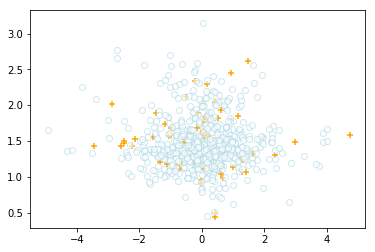

In [132]:
smarket['direction_ind']=pd.factorize(smarket.Direction)[0]


# Take a fraction of the samples where target value is 'down'
df_no = smarket[smarket.direction_ind == 0].sample(frac=0.15)
# Take all samples  where target value is 'up'
df_yes = smarket[smarket.direction_ind == 1]
df_ = df_no.append(df_yes)

plt.scatter(df_[df_.Direction == 'Up'].Lag2, df_[df_.Direction == 'Up'].Volume, c='orange', marker='+',
            linewidths=1)
plt.scatter(df_[df_.Direction == 'Down'].Lag2, df_[df_.Direction == 'Down'].Volume, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)


plt.show()

In [19]:
#dimension of data:
smarket.shape

(1250, 10)

In [20]:
#correlation matrix
smarket.corr()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Unnamed: 0,1.000000,0.979773,0.035415,0.036022,0.038989,0.041437,0.035025,0.546348,0.035273
Year,0.979773,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.035415,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.036022,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.038989,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.041437,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.035025,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.546348,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.035273,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


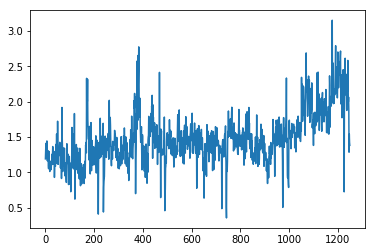

In [29]:
plt.plot(smarket.Volume)

In [ ]:
#logistic Regression

In [40]:
log_reg = LogisticRegression()
x=smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']].as_matrix()
y= smarket['Direction']
model1= log_reg.fit(x,y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [41]:
print(model1.coef_)

[[-0.07279035 -0.04229102  0.010958    0.00921799  0.01023031  0.12793931]]


In [59]:
#or try this way
#statsmodels is very similar to R glm function, it can produces most of results in a single table using summary function
logit_model =sm.Logit(pd.factorize(y)[0],x.astype(float)) #object type cannot be used here
result= logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.691143
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.002    
Dependent Variable: y                AIC:              1739.8583
Date:               2019-04-10 13:34 BIC:              1770.6436
No. Observations:   1250             Log-Likelihood:   -863.93  
Df Model:           5                LL-Null:          -865.59  
Df Residuals:       1244             LLR p-value:      0.65131  
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
-------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
-------------------------------------------------------------------
x1     0.0721      0.0501     1.4378    0.1505    -0.0262    0.1703
x2     0.0434      0.0500     0.8678    0.3855    -0.0546    0.141

In [62]:
model2= sm.GLM(pd.factorize(y)[0],x.astype(float), family=sm.families.Binomial())
model2_result= model2.fit()
print(model2_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1244
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.93
Date:                Wed, 10 Apr 2019   Deviance:                       1727.9
Time:                        13:44:52   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0721      0.050      1.438      0.150      -0.026       0.170
x2             0.0434      0.050      0.868      0.3

In [ ]:
#train the model

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state= 0)

In [73]:
model3= log_reg.fit(x_train, y_train)
print(model3.coef_)

[[-0.06756919 -0.06561412  0.04349014 -0.03971087 -0.03472513  0.09201262]]


In [75]:
y_pred= model3.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 46 138]
 [ 50 141]]


This matrix is telling us we have 46+141 correct predictions and 50+138 incorrect predictions.

In [78]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       Down       0.48      0.25      0.33       184
         Up       0.51      0.74      0.60       191

avg / total       0.49      0.50      0.47       375



The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
citation: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


In [85]:
from sklearn.metrics import roc_curve, auc
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.49866666666666665


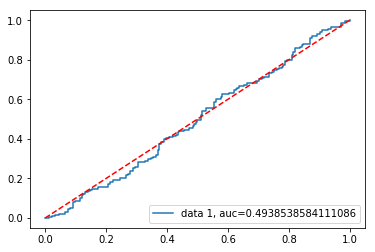

In [100]:
y_pred_proba = model3.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(pd.factorize(y_test)[0],  y_pred_proba)
auc = metrics.roc_auc_score(pd.factorize(y_test)[0], y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()

yep, both precision table and ROC curve looks pretty bad!

In [ ]:
#LDA

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [150]:
before_2005 = smarket.Year <2005
after_2005 = smarket.Year>=2005
X_train = smarket[before_2005][['Lag1','Lag2']]
y_train = smarket[before_2005]['Direction']

X_test = smarket[after_2005][['Lag1','Lag2']]
y_test = smarket[after_2005]['Direction']
lda_model =lda.fit(X_train, y_train)
pred = lda_model.predict(X_test)
print('coefficient value {}'.format(lda_model.coef_))
print('mean value {}'.format(lda_model.means_))

coefficient value [[-0.05544078 -0.0443452 ]]
mean value [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [153]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

       Down       0.50      0.32      0.39       111
         Up       0.58      0.75      0.66       141

avg / total       0.55      0.56      0.54       252



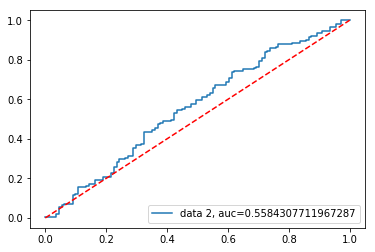

In [162]:
#ROC curve for LDA model
y_pred_proba_lda = lda_model.predict_proba(X_test)
fpr_lda, tpr_lda, _lda = metrics.roc_curve(pd.factorize(y_test)[0],  y_pred_proba_lda[:,1])
auc_lda = metrics.roc_auc_score(pd.factorize(y_test)[0], y_pred_proba_lda[:,1])
plt.plot(fpr_lda,tpr_lda,label="data 2, auc="+str(auc_lda))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()


In [ ]:
#QDA

In [168]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(X_train, y_train)
qda_pred= qda_model.predict(X_test)
print('Prior Probabilities of groups {}'.format(qda_model.priors_))
print('Group means {}'.format(qda_model.means_))

Prior Probabilities of groups [0.49198397 0.50801603]
Group means [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [169]:
metrics.confusion_matrix(y_test, qda_pred)

array([[ 30,  81],
       [ 20, 121]])

In [171]:
print(classification_report(y_test, qda_pred))

             precision    recall  f1-score   support

       Down       0.60      0.27      0.37       111
         Up       0.60      0.86      0.71       141

avg / total       0.60      0.60      0.56       252



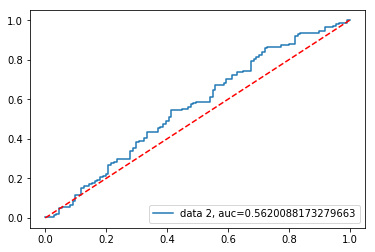

In [174]:
#ROC curve for QDA model
y_pred_proba_qda = qda_model.predict_proba(X_test)
fpr_qda, tpr_qda, _qda = metrics.roc_curve(pd.factorize(y_test)[0],  y_pred_proba_qda[:,1])
auc_qda = metrics.roc_auc_score(pd.factorize(y_test)[0], y_pred_proba_qda[:,1])
plt.plot(fpr_qda,tpr_qda,label="data 2, auc="+str(auc_qda))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()


In [179]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifer= KNeighborsClassifier(n_neighbors=1)
knn_model= classifer.fit(X_train, y_train)
knn_pred= knn_model.predict(X_test)
print(classification_report(y_test, knn_pred))
print(metrics.confusion_matrix(y_test, knn_pred))

             precision    recall  f1-score   support

       Down       0.43      0.39      0.41       111
         Up       0.55      0.59      0.57       141

avg / total       0.50      0.50      0.50       252

[[43 68]
 [58 83]]


In [180]:
(43+83)/252

0.5

In [181]:
#try k=3
classifer2= KNeighborsClassifier(n_neighbors=3)
knn_model2= classifer2.fit(X_train, y_train)
knn_pred2= knn_model2.predict(X_test)
print(classification_report(y_test, knn_pred2))
print(metrics.confusion_matrix(y_test, knn_pred2))

             precision    recall  f1-score   support

       Down       0.47      0.43      0.45       111
         Up       0.58      0.61      0.59       141

avg / total       0.53      0.53      0.53       252

[[48 63]
 [55 86]]


In [182]:
(48+86)/252 

0.5317460317460317

In [212]:
#An Application to Caravan Insurance Data
caravan= pd.read_csv('Dataset/Caravan.csv')
df=caravan.drop('Unnamed: 0', axis=1)
df.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [213]:
df['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [214]:
#scale variables
X= df.drop('Purchase', axis =1)
y= df.Purchase
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit(X)
scale.transform(X)

array([[ 0.68090623, -0.27257995,  0.40669664, ..., -0.15062046,
        -0.08734772, -0.11881647],
       [ 0.99229684, -0.27257995, -0.85950007, ..., -0.15062046,
        -0.08734772, -0.11881647],
       [ 0.99229684, -0.27257995, -0.85950007, ..., -0.15062046,
        -0.08734772, -0.11881647],
       ...,
       [ 0.68090623, -0.27257995,  0.40669664, ..., -0.15062046,
        -0.08734772, -0.11881647],
       [ 0.75875388, -0.27257995,  0.40669664, ..., -0.15062046,
        -0.08734772, -0.11881647],
       [ 0.68090623, -0.27257995,  0.40669664, ..., -0.15062046,
        -0.08734772, -0.11881647]])

In [215]:
X_train =X.iloc[1000:,:]
X_test=X.iloc[0:1000,:]
y_train =y.iloc[1000:]
y_test =y.iloc[0:1000]
X_train_scale = scale.transform(X_train)
X_test_scale= scale.transform(X_test)

In [217]:
#K=1
knn_1= KNeighborsClassifier(n_neighbors=1)
mod1= knn_1.fit(X_train_scale, y_train)
knn_1_pred= mod1.predict(X_test_scale)
print(metrics.confusion_matrix(y_test, knn_1_pred))

[[873  68]
 [ 50   9]]


In [219]:
9/(9+68)

0.11688311688311688

In [220]:
#k=3
knn_3= KNeighborsClassifier(n_neighbors=3)
mod3= knn_3.fit(X_train_scale, y_train)
knn_3_pred= mod3.predict(X_test_scale)
print(metrics.confusion_matrix(y_test, knn_3_pred))

[[921  20]
 [ 54   5]]


In [221]:
5/(5+25)

0.16666666666666666

In [222]:
#k=5
knn_5= KNeighborsClassifier(n_neighbors=5)
mod5= knn_5.fit(X_train_scale, y_train)
knn_5_pred= mod5.predict(X_test_scale)
print(metrics.confusion_matrix(y_test, knn_5_pred))

[[930  11]
 [ 55   4]]


In [223]:
4/(4+11)

0.26666666666666666

In [224]:
#Logistics Regression
logreg =LogisticRegression()
model4= logreg.fit(X_train, y_train)
model4

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [228]:
pred= model4.predict(X_test)
pd.DataFrame(metrics.confusion_matrix(y_test, pred), index= logreg.classes_, columns=logreg.classes_ )

,No,Yes
No,939,2
Yes,59,0


In [229]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

         No       0.94      1.00      0.97       941
        Yes       0.00      0.00      0.00        59

avg / total       0.89      0.94      0.91      1000



In [236]:
pred_p= model4.predict_proba(X_test)
cm_df = pd.DataFrame({'True': y_test, 'Pred': pred_p[:,1] >0.25})
cm_df.Pred.replace(to_replace ={True:'Yes', False: 'No'}, inplace=True)
cm_df.groupby(['True' ,'Pred']).size().unstack('True').T

Pred,No,Yes
True,,
No,921,20
Yes,51,8


In [237]:
8/28

0.2857142857142857